# Decision Trees and Random Forests

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [5]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


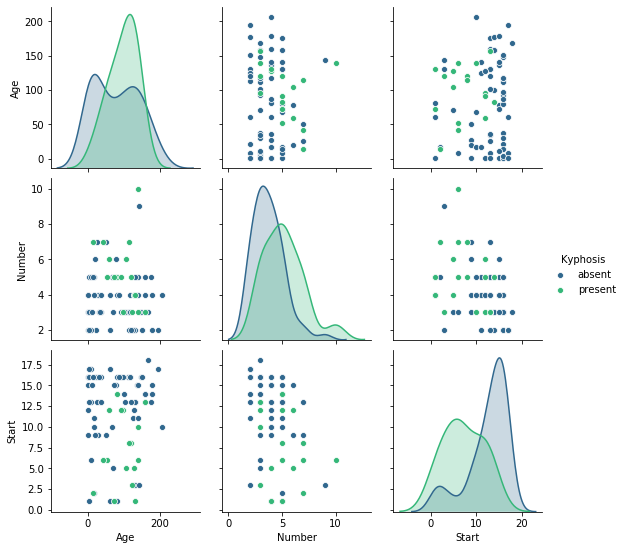

In [14]:
sns.pairplot(data=df,hue='Kyphosis',palette='viridis')

In [64]:
# Train-Test Split
from sklearn.model_selection import train_test_split


In [65]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [66]:
# Pass in single decision tree
from sklearn.tree import DecisionTreeClassifier

In [67]:
# Model
dtree = DecisionTreeClassifier()


In [68]:
# Fit our model to training data sets
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [69]:
predictions = dtree.predict(X_test)

In [70]:
predictions

array(['present', 'present', 'present', 'absent', 'present', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'present', 'present', 'absent', 'absent', 'present', 'absent',
       'absent', 'present', 'absent'], dtype=object)

In [71]:
# Evaluation for Trees
from sklearn.metrics import classification_report, confusion_matrix

In [72]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[16  6]
 [ 1  4]]


              precision    recall  f1-score   support

      absent       0.94      0.73      0.82        22
     present       0.40      0.80      0.53         5

    accuracy                           0.74        27
   macro avg       0.67      0.76      0.68        27
weighted avg       0.84      0.74      0.77        27



In [73]:
# Compare model to random forests
from sklearn.ensemble import RandomForestClassifier

In [74]:
# Random Forest Classifier Model
rfc = RandomForestClassifier(n_estimators=200)

In [75]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
# Predict our data
rfc_pred = rfc.predict(X_test)


In [77]:
rfc_pred

array(['present', 'absent', 'present', 'absent', 'present', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present', 'present', 'absent', 'absent', 'present', 'absent',
       'absent', 'present', 'absent'], dtype=object)

In [78]:
# Evaluation for Random Forests
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[18  4]
 [ 1  4]]


              precision    recall  f1-score   support

      absent       0.95      0.82      0.88        22
     present       0.50      0.80      0.62         5

    accuracy                           0.81        27
   macro avg       0.72      0.81      0.75        27
weighted avg       0.86      0.81      0.83        27



In [79]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64